In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
orders = pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv",encoding='latin-1')
orders_details = pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv",encoding='latin-1')
pizzas = pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv",encoding='latin-1')
pizza_types = pd.read_csv("/kaggle/input/pizza-place-sales/pizza_types.csv",encoding='latin-1')

# Data Understanding

In [3]:
orders.head(10)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
5,6,2015-01-01,12:29:36
6,7,2015-01-01,12:50:37
7,8,2015-01-01,12:51:37
8,9,2015-01-01,12:52:01
9,10,2015-01-01,13:00:15


In [4]:
# Join the tables based on the provided data dictionary
merged_data = pd.merge(orders, orders_details, on='order_id')
merged_data = pd.merge(merged_data, pizzas, on='pizza_id')
merged_data = pd.merge(merged_data, pizza_types, on='pizza_type_id')
merged_data

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [5]:
df = merged_data

In [6]:
df.head(10)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
5,314,2015-01-06,12:11:58,716,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
6,351,2015-01-06,17:37:29,806,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
7,377,2015-01-07,12:03:18,856,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
8,558,2015-01-09,20:51:10,1263,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,580,2015-01-10,13:56:01,1312,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [8]:
df.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


In [9]:
df.shape

(48620, 12)

In [10]:
df.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')

In [11]:
df.isnull().any()

order_id            False
date                False
time                False
order_details_id    False
pizza_id            False
quantity            False
pizza_type_id       False
size                False
price               False
name                False
category            False
ingredients         False
dtype: bool

In [12]:
df.duplicated().any()

False

# Feature Engineering

In [13]:
# List of non-veg ingredients
non_veg_ingredients = [
    "Pepperoni", "Bacon", "Sliced Ham", "Chicken", "Thai Sweet Chilli Sauce",
    "Luganega Sausage", "Coarse Sicilian Salami", "Capocollo", "Calabrese Salami",
    "Italian Sausage", "Chorizo Sausage", "Anchovies", "Prosciutto di San Daniele",
    "Genoa Salami", "Kalamata Olives", "Beef Chuck Roast", "Soppressata Salami",
    "Eggplant", "Pesto Sauce", "Nduja Salami", "Pancetta", "Friggitello Peppers",
    "Plum Tomatoes", "Brie Carre Cheese", "Prosciutto", "Caramelized Onions", "Pears", "Thyme"
]

# Define a function to check if any non-veg ingredient is present
def has_non_veg_ingredient(ingredients):
    return any(ingredient in ingredients for ingredient in non_veg_ingredients)

# Create the "is_veg" column based on the "ingredients" column
df['is_non_veg'] = df['ingredients'].apply(has_non_veg_ingredient)

# Display the DataFrame with the "is_veg" column
df.head(10)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,is_non_veg
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
5,314,2015-01-06,12:11:58,716,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
6,351,2015-01-06,17:37:29,806,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
7,377,2015-01-07,12:03:18,856,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
8,558,2015-01-09,20:51:10,1263,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
9,580,2015-01-10,13:56:01,1312,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True


# EDA process
* <b>Question 1</b>: Sales distribution with respect to category
* Question 2: Most opted pizza size
* Question 3: Distribution of sales between veg & non-veg pizzas
* Question 4: Mean price for each type
* Question 5: Price Distribution
* Question 6: Sales trend over the years
* Question 7: Sales trend over Quaterly

## Question 1

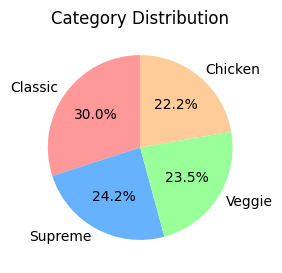

In [14]:

question1 ='''
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Set custom colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create a pie chart
plt.figure(figsize=(8, 3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Category Distribution")

# Display the plot
plt.show()
'''

exec(question1)

## Question 2

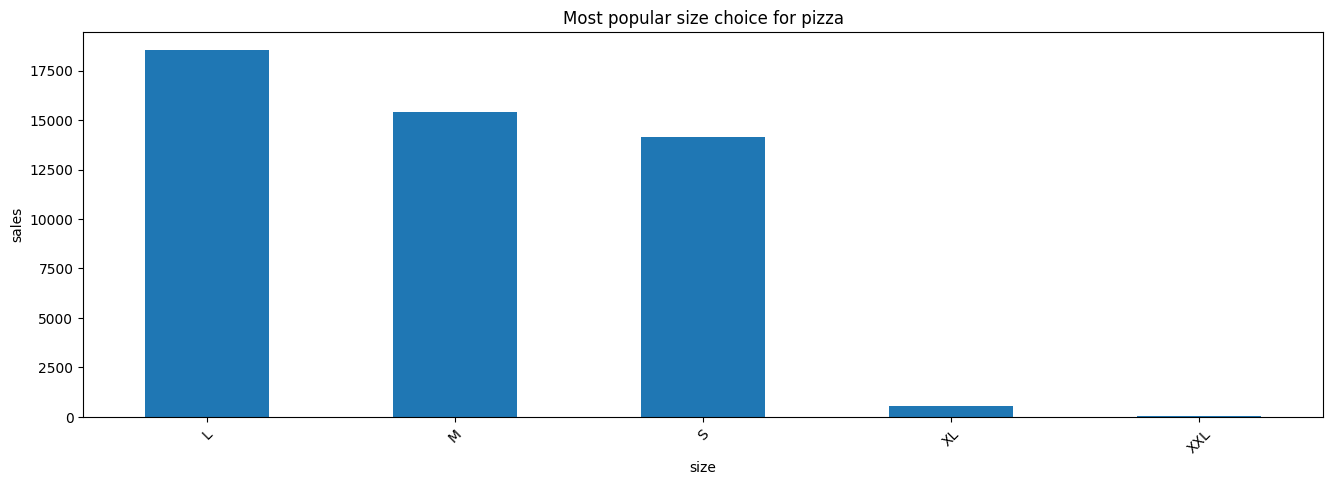

In [15]:
question2 = '''
plt.figure(figsize=(16,5))
df['size'].value_counts().plot(kind='bar')
plt.title("Most popular size choice for pizza")
plt.xlabel("size")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.show()
'''

exec(question2)

In [16]:
df['ingredients'].value_counts()

ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccant

In [17]:
df.head(10)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,is_non_veg
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
5,314,2015-01-06,12:11:58,716,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
6,351,2015-01-06,17:37:29,806,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
7,377,2015-01-07,12:03:18,856,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
8,558,2015-01-09,20:51:10,1263,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True
9,580,2015-01-10,13:56:01,1312,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",True


In [18]:
df['is_non_veg'].value_counts()

is_non_veg
True     40026
False     8594
Name: count, dtype: int64

## Question 3

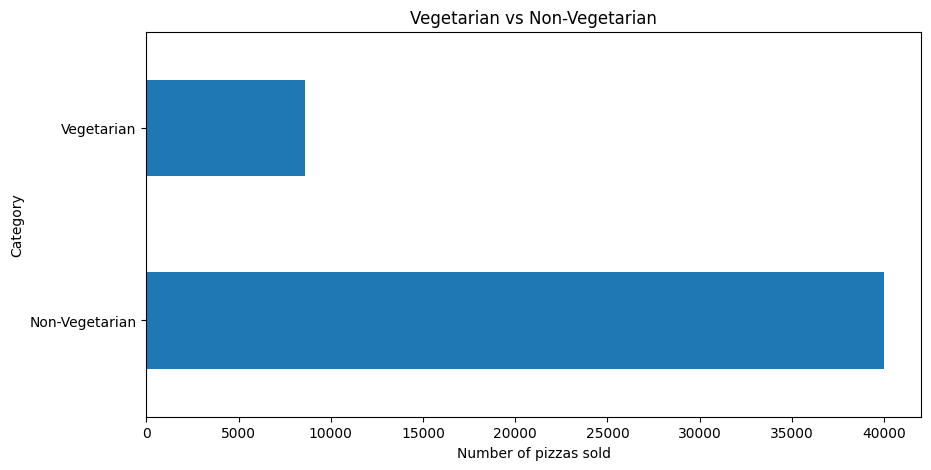

In [19]:
import matplotlib.pyplot as plt

question3 = '''
# Create a horizontal bar plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
df['is_non_veg'].value_counts().plot(kind='barh')
plt.title("Vegetarian vs Non-Vegetarian")
plt.xlabel("Number of pizzas sold")
plt.ylabel("Category")

# Change the y-labels
plt.yticks([0, 1], ['Non-Vegetarian', 'Vegetarian'])

plt.show()
'''

exec(question3)


In [20]:
df['price'].mean()

16.494132044426163

## Question 4

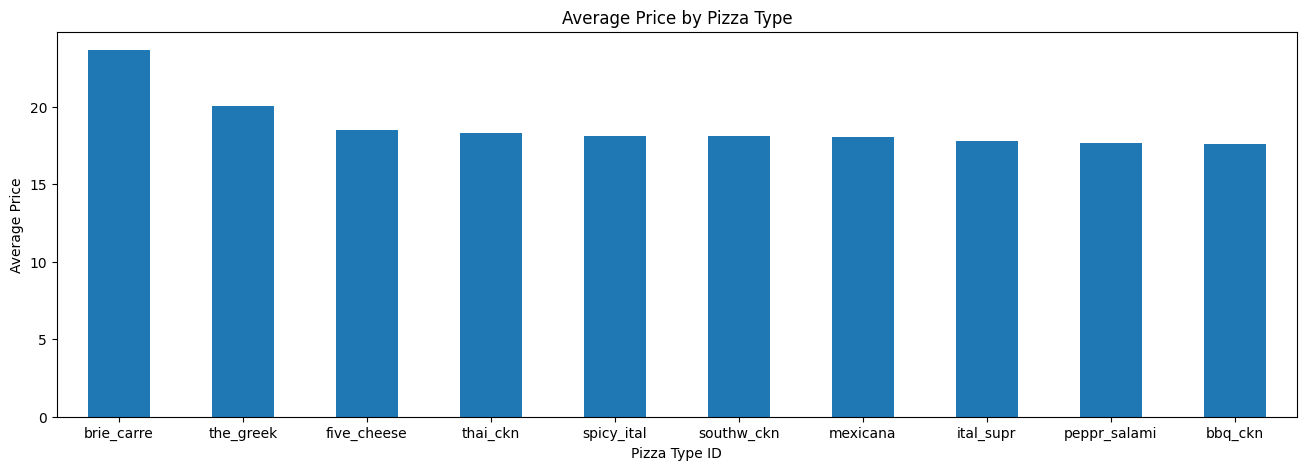

In [21]:
question4 ='''
# Group by 'pizza_type_id' and calculate the mean price for each type
grouped = df.groupby('pizza_type_id')['price'].mean()
grouped = grouped.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(16, 5))  # Adjust the figure size as needed
grouped.head(10).plot(kind='bar')
plt.title("Average Price by Pizza Type")
plt.xlabel("Pizza Type ID")
plt.ylabel("Average Price")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()
'''

exec(question4)

## Question 5

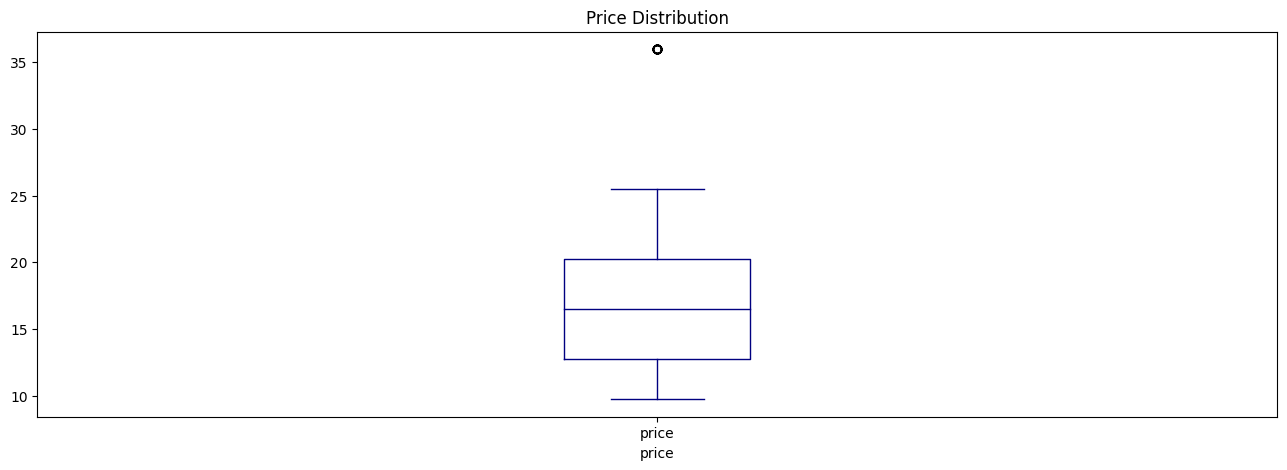

In [22]:

question5 = '''
plt.figure(figsize=(16, 5))  # Adjust the figure size as needed
df['price'].plot(kind='box',color='navy')
plt.title("Price Distribution")
plt.xlabel("price")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()
'''

exec(question5)

## Qustion 6

In [23]:
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])

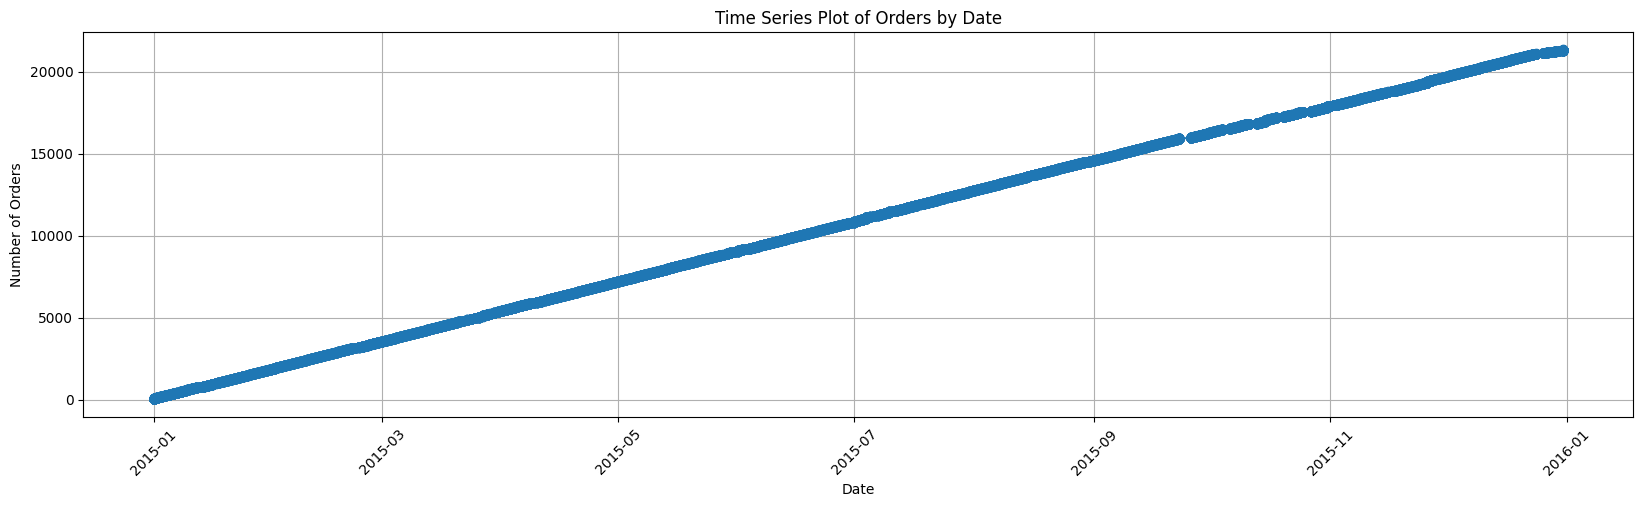

In [24]:
question6='''
# Sort the DataFrame by date (optional but recommended)
df = df.sort_values(by='date')

# Create the time series plot
plt.figure(figsize=(20, 5))
plt.plot(df['date'], df['order_id'], marker='o', linestyle='-')
plt.title('Time Series Plot of Orders by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)

# Format date labels on the x-axis (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()
'''
exec(question6)

## Question 7

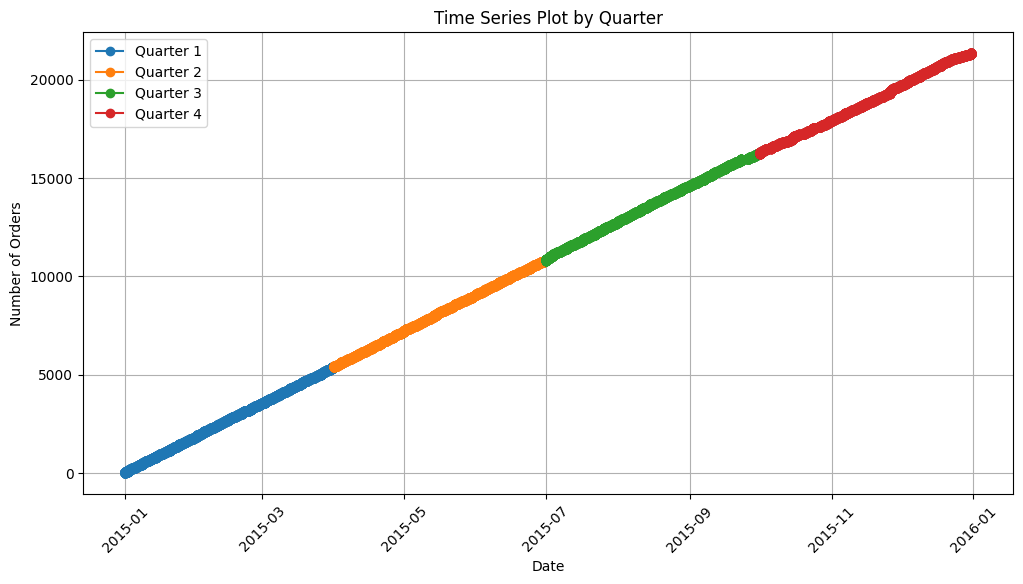

In [25]:
question7='''
# Extract the quarter from the 'date' column
df['quarter'] = df['date'].dt.quarter

# Sort the DataFrame by date (optional but recommended)
df = df.sort_values(by='date')

# Create time series plots for each quarter
quarters = df['quarter'].unique()

plt.figure(figsize=(12, 6))

for quarter in quarters:
    subset = df[df['quarter'] == quarter]
    plt.plot(subset['date'], subset['order_id'], marker='o', linestyle='-', label=f'Quarter {quarter}')

plt.title('Time Series Plot by Quarter')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)

# Format date labels on the x-axis (optional)
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()
'''
exec(question7)

# Model Training

In [26]:
df.dtypes

order_id                     int64
date                datetime64[ns]
time                        object
order_details_id             int64
pizza_id                    object
quantity                     int64
pizza_type_id               object
size                        object
price                      float64
name                        object
category                    object
ingredients                 object
is_non_veg                    bool
quarter                      int32
dtype: object

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()

# Encode categorical columns and replace them with numeric labels
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract datetime features from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01)
}

# Select features (independent variables) and the target (dependent variable)
X = df[['quantity', 'is_non_veg', 'year', 'month', 'day', 'hour'] + list(categorical_columns)]  # Features
y = df['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print("=" * 30)


Model: Linear Regression
Root Mean Squared Error (RMSE): 2.10033626233971
R-squared (R2): 0.666035722332581
Model: Decision Tree Regression
Root Mean Squared Error (RMSE): 5.755127143710769e-14
R-squared (R2): 1.0
Model: Random Forest Regression
Root Mean Squared Error (RMSE): 1.5554874509296278e-14
R-squared (R2): 1.0
Model: Gradient Boosting Regression
Root Mean Squared Error (RMSE): 0.17169662888076248
R-squared (R2): 0.9977682482161049
Model: K-Nearest Neighbors Regression
Root Mean Squared Error (RMSE): 3.7508340934443676
R-squared (R2): -0.06506978394998408
Model: Ridge Regression
Root Mean Squared Error (RMSE): 2.1003375848717036
R-squared (R2): 0.6660353017536587
Model: Lasso Regression
Root Mean Squared Error (RMSE): 2.101709099372787
R-squared (R2): 0.6655990033429966


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.066e+02, tolerance: 5.093e+01
  model = cd_fast.enet_coordinate_descent(


# HyperparameterTuning Gradient Boosting Regressor

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Select features (independent variables) and the target (dependent variable)
X = df[['quantity', 'is_non_veg', 'year', 'month', 'day', 'hour'] + list(categorical_columns)]  # Features
y = df['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # You can specify a range of values for each parameter
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the Grid Search object
grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Optimization metric (negative MSE)
    verbose=2,  # Print detailed progress
    n_jobs=-1  # Use all available CPU cores
)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best hyperparameters to create and train the model
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Optimized Gradient Boosting Regressor:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Optimized Gradient Boosting Regressor:
Root Mean Squared Error (RMSE): 6.768514324474185e-07
R-squared (R2): 0.9999999999999654


In [30]:

# Select a single sample from X_test, e.g., the first sample (you can change the index)
single_sample = X_test.iloc[0:1]

# Make predictions on the single sample
y_pred_single = best_model.predict(single_sample)

# Get the actual target value from y_test for the single sample
y_actual_single = y_test.iloc[0:1]

# Calculate evaluation metrics for the single prediction
mse_single = mean_squared_error(y_actual_single, y_pred_single)
rmse_single = np.sqrt(mse_single)

single_sample


,quantity,is_non_veg,year,month,day,hour,time,pizza_id,pizza_type_id,size,name,category,ingredients
30375,1,True,2015,11,15,0,4006,51,19,1,20,1,15


In [31]:
print(round(y_pred_single[0],1))

12.5
